In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS


from PIL import Image
import numpy as np

In [50]:
df = pd.read_csv("datos/top10_actors.csv", sep = ";")
df.head(2)

,name,image,description,positions,known_for,Banda sonora,Guion y continuidad,Composición,sonido de archivo,Música,Como sí mismos,Agradecimientos,metraje de archivo,Producción,Dirección,Equipos adicionales
0,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El aguador,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
1,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,"6,1",34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN


In [15]:
df.columns

Index(['name', 'image', 'description', 'positions', 'known_for',
       'Banda sonora', 'Guion y continuidad', 'Composición',
       'sonido de archivo', 'Música', 'Como sí mismos', 'Agradecimientos',
       'metraje de archivo', 'Producción', 'Dirección', 'Equipos adicionales'],
      dtype='object')

Elige un actor ['Adam Sandler' 'Maya Rudolph' 'Andrew Bachelor' 'Keegan-Michael Key'
 'Robbie Amell' 'Jacki Weaver' 'Rob Schneider' 'Nick Swardson'
 'Lakeith Stanfield' 'Zachary Quinto']Adam Sandler


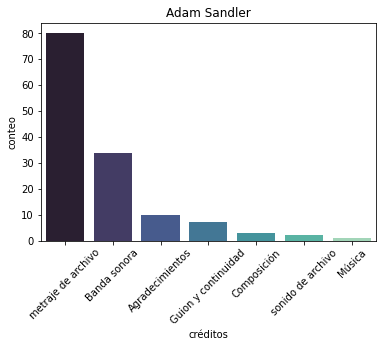

In [43]:
#Generador de gráficas de actores
df_ejercicio = df.drop(["image", "description", "positions", "known_for", "Como sí mismos"], axis = 1).drop_duplicates(subset=["name"])
nombre = input(f"Elige un actor {df_ejercicio['name'].unique()}")
df_actor = df_ejercicio[df_ejercicio["name"] == nombre].drop("name", axis = 1).T.reset_index().dropna()
df_actor.columns = ["créditos", "conteo"]
df_actor.sort_values(by = "conteo", ascending = False, inplace = True)
sns.barplot(data = df_actor, x = "créditos", y = "conteo", palette = "mako")
plt.title(nombre)
plt.xticks(rotation = 45);

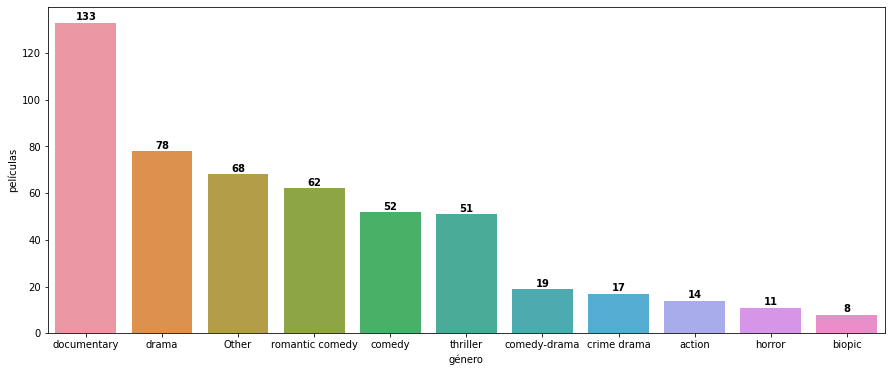

In [83]:
#Ejemplo tocho de poner cifras encima de las barras
df2 = pd.read_csv("datos/netflix_clean.csv")
df2_clean = df2.groupby(["genre2"])["title"].count().reset_index().sort_values(by = "title", ascending = False)

plt.figure(figsize = (15, 6))
fig = sns.barplot(data = df2_clean, x = "genre2", y = "title")
ejex = df2_clean["genre2"].unique().tolist() # Lista de géneros
ejey = df2_clean["title"].unique().tolist() # Lista de valores
plt.xlabel("género")
plt.ylabel("películas")
for etiqueta, valor in zip (range(len(ejex)), ejey): #hacemos zip de los dos valores
    fig.annotate(valor,
                (etiqueta, valor + 1),
                fontweight = "bold",
                horizontalalignment = "center")
 # poner los valores en la gráfica
    ;
    